# Task 1 - Exploratory Data Analysis (EDA) and Business Insights

### Import modules

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset and Inspecting

In [13]:
# Load Datasets
customers = pd.read_csv("./Customers.csv")
products = pd.read_csv("./Products.csv")
transactions = pd.read_csv("./Transactions.csv")

In [20]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [21]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [22]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [30]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Hence no missing values

### Analysis on the Customers dataset

1. Customer distribution by region

In [39]:
region_count = customers['Region'].value_counts()
print(region_count)

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


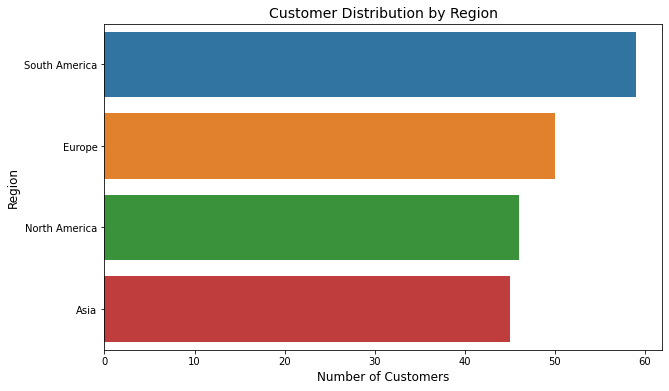

In [85]:
# Visualise customer distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=region_count.values, y=region_count.index)
plt.title('Customer Distribution by Region', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

Most customers are from South America. Least from Asia.

2. Signup trend over time

In [41]:
# Convert SignupDate column to Datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

signup_trend = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
print(signup_trend)

2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: SignupDate, dtype: int64


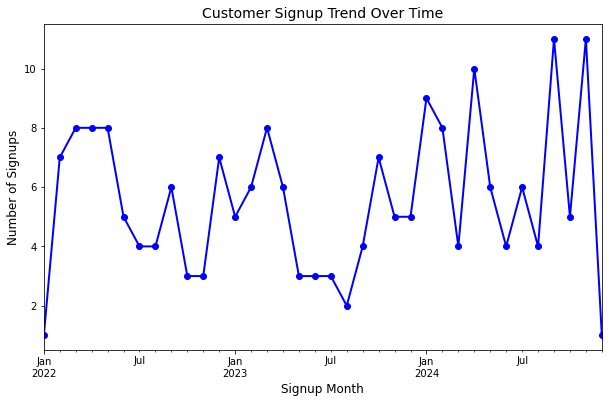

In [84]:
# Visualise signup trends over time
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Customer Signup Trend Over Time', fontsize=14)
plt.xlabel('Signup Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.show()

Peak time for customer signup was end of 2024.

### Analysis on Products Dataset

1. What are the most expensive and cheapest products?

In [49]:
price_stats = products['Price'].describe()
price_stats

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

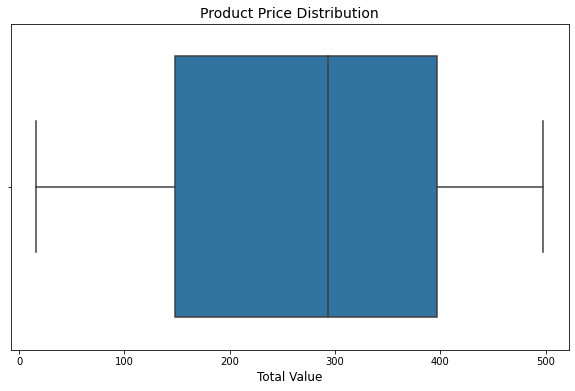

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=products['Price'])
plt.title('Product Price Distribution', fontsize=14)
plt.xlabel('Total Value', fontsize=12)
plt.show()

Average product price is 267.5, prices are sightly negatively skewed.

2. Which product categories dominate?

In [53]:
category_count = products['Category'].value_counts()
category_count

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

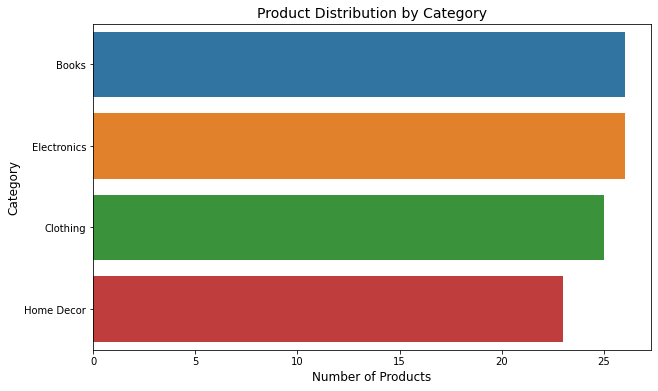

In [82]:
# Visualise category-wise distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_count.values, y=category_count.index)
plt.title('Product Distribution by Category', fontsize=14)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

Books and electronics are the top products sold by the business

### Analysis on Transactions Dataset

1. Average and total sales values

In [56]:
transaction_stats = transactions['TotalValue'].describe()
transaction_stats

count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

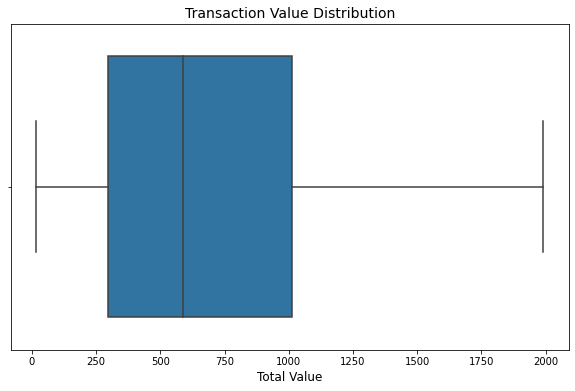

In [81]:
# Visualise transaction stats
plt.figure(figsize=(10, 6))
sns.boxplot(x=transactions['TotalValue'])
plt.title('Transaction Value Distribution', fontsize=14)
plt.xlabel('Total Value', fontsize=12)
plt.show()

Average transaction is of 690. Transaction distribution is positively skewed (more low-value transactions)

### Data Merging

In [23]:
# Check if all CustomerIDs in Transactions are in Customers
missing_customers = set(transactions['CustomerID']) - set(customers['CustomerID'])
print(missing_customers)

# Check if all ProductIDs in Transactions are in Products
missing_products = set(transactions['ProductID']) - set(products['ProductID'])
print(missing_products)

set()
set()


Hence all CustomerID in the Transactions dataset are present in the Customers dataset and all ProductID in the Transactions dataset are present in the Products dataset. We can now merge the datasets.

In [37]:
# Merge datasets
merged_df = transactions.merge(customers, how="inner", on="CustomerID").merge(products, how="inner", on="ProductID")
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


### Analysis on Merged Dataset

1. Which products and categories generate the most revenue?

In [67]:
# Revenue by product
product_revenue = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print(product_revenue)

# Revenue by category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)

ProductName
ActiveWear Smartwatch          39096.97
SoundWave Headphones           25211.64
SoundWave Novel                24507.90
ActiveWear Jacket              22712.56
ActiveWear Rug                 22314.43
                                 ...   
ComfortLiving Desk Lamp         1694.16
SoundWave Bluetooth Speaker     1223.22
ComfortLiving Rug               1063.81
ActiveWear T-Shirt               795.34
ComfortLiving Laptop             647.76
Name: TotalValue, Length: 66, dtype: float64
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


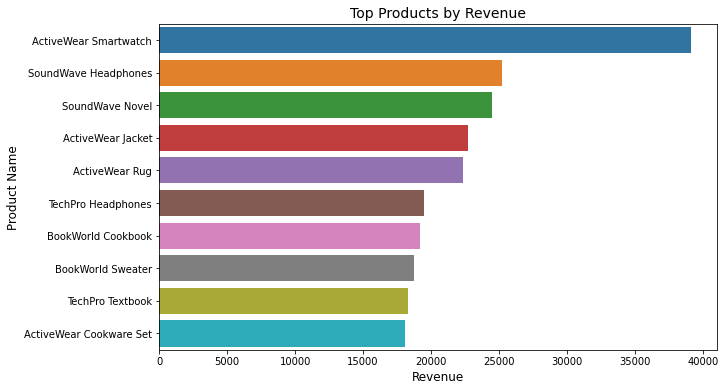

In [69]:
# Visualise top 10 products by revenue
product_revenue = product_revenue.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index)
plt.title('Top Products by Revenue', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

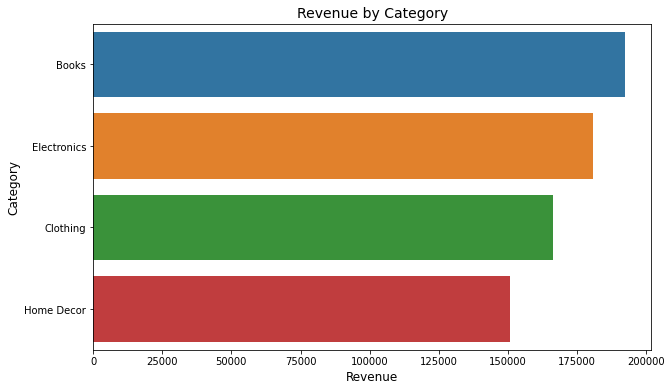

In [70]:
# Visualise revenue by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title('Revenue by Category', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

Although books generate most of the revenue, electronics are the most sold products.

2. Which regions have the highest sales?


In [71]:
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

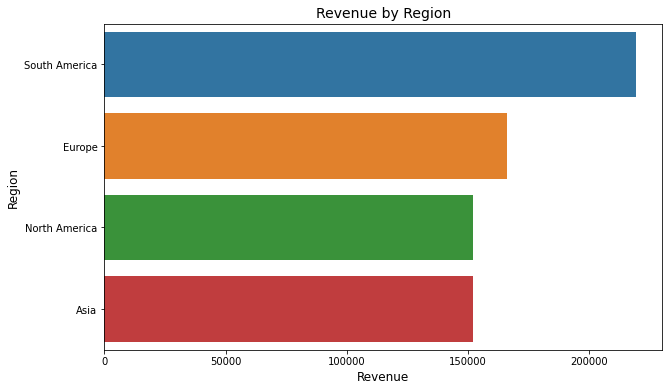

In [73]:
# Visualise revenue by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.values, y=region_revenue.index)
plt.title('Revenue by Region', fontsize=14)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

South America region is a high-value market for the business.

3. Top category per region by Revenue

In [78]:
region_category = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()
top_category_per_region = region_category.loc[region_category.groupby('Region')['TotalValue'].idxmax()]

top_category_per_region

,Region,Category,TotalValue
1,Asia,Clothing,49353.09
4,Europe,Books,47464.42
10,North America,Electronics,44716.43
12,South America,Books,69752.03


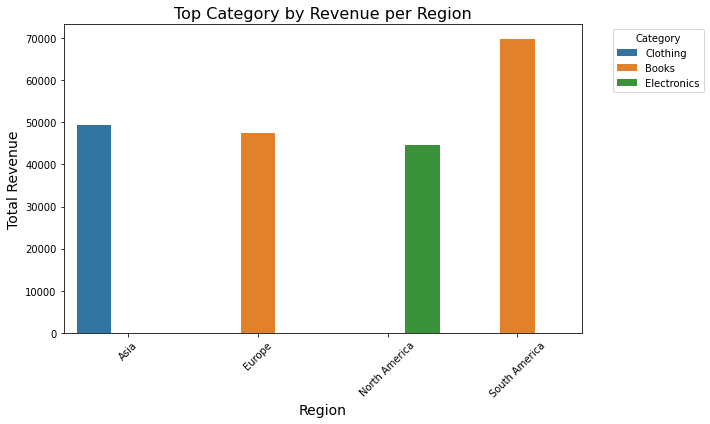

In [80]:
# Visualise top category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_category_per_region, x='Region', y='TotalValue', hue='Category')
plt.title('Top Category by Revenue per Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

South America's top category is Books which contributes the most to the total revenue.

### Business Insights from Analysis

1. South America is both the high-value market and the region with the most customers
2. Although electronics are the most sold products, they do not generate as much revenue as books. This suggests that electronics are likely lower in price or sold in smaller transaction sizes.
3. Books generate the most revenue despite their sales volume being lower than electronics.
4. Transactions are positively skewed, meaning many are low-value.
5. The peak time for customer signup was at the end of 2024, potentially linked to holiday seasons or marketing efforts.
6. South America's top category is Books which contributes the most to the total revenue while North America's top category Electronics contibutes the least.